# Global Temperature Time Series

https://www.kaggle.com/datasets/ianpetrustan/global-temperature-time-series

### Exploratory Data Analysis

For this part, we will open and check the dataset for any missing values, inconsistencies, any outliers or missing data, and deal with them if we ever found one.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Opening the dataset
df = pd.read_csv('monthly_csv.csv')
df.head()

Source        Date    Mean
0     GCAG  2016-12-06  0.7895
1  GISTEMP  2016-12-06  0.8100
2     GCAG  2016-11-06  0.7504
3  GISTEMP  2016-11-06  0.9300
4     GCAG  2016-10-06  0.7292

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  3288 non-null   object 
 1   Date    3288 non-null   object 
 2   Mean    3288 non-null   float64
dtypes: float64(1), object(2)
memory usage: 77.2+ KB


In [4]:
# checking nulls for every column
for column in df.columns:
    print(f"{column} has {df[column].isnull().sum()} missing values")

Source has 0 missing values
Date has 0 missing values
Mean has 0 missing values


In [5]:
# checking unique vals
for column in df.columns:
    print(f"nunique: {df[column].nunique()}")
    print(f"{column} has {df[column].unique()} unique values")

nunique: 2
Source has ['GCAG' 'GISTEMP'] unique values
nunique: 1644
Date has ['2016-12-06' '2016-11-06' '2016-10-06' ... '1880-03-06' '1880-02-06'
 '1880-01-06'] unique values
nunique: 1674
Mean has [ 0.7895  0.81    0.7504 ... -0.0499 -0.1357  0.0009] unique values


As we can see we have multiple dates, as the number of unique dates is only 1644. Why is this?

In [6]:
df.groupby('Date')['Source'].count()

Date
1880-01-06    2
1880-02-06    2
1880-03-06    2
1880-04-06    2
1880-05-06    2
             ..
2016-08-06    2
2016-09-06    2
2016-10-06    2
2016-11-06    2
2016-12-06    2
Name: Source, Length: 1644, dtype: int64

It's because each source (GCAG, GISTEMP) contribute a mean for each month. 1644 * 2 = 3288

In [7]:
df.sample(10)

Source        Date    Mean
713   GISTEMP  1987-04-06  0.2400
365   GISTEMP  2001-10-06  0.5200
910      GCAG  1979-01-06  0.1602
2853  GISTEMP  1898-02-06 -0.3400
195   GISTEMP  2008-11-06  0.6600
1244     GCAG  1965-02-06 -0.1966
1675  GISTEMP  1947-03-06  0.0500
2685  GISTEMP  1905-02-06 -0.5900
1109  GISTEMP  1970-10-06  0.0500
773   GISTEMP  1984-10-06  0.1500

In [8]:
dates = pd.to_datetime(df['Date'])
df['Date'] = dates

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.drop('Date', axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Source  3288 non-null   object 
 1   Mean    3288 non-null   float64
 2   Year    3288 non-null   int32  
 3   Month   3288 non-null   int32  
 4   Day     3288 non-null   int32  
dtypes: float64(1), int32(3), object(1)
memory usage: 90.0+ KB


In [10]:
df.head(5)

Source    Mean  Year  Month  Day
0     GCAG  0.7895  2016     12    6
1  GISTEMP  0.8100  2016     12    6
2     GCAG  0.7504  2016     11    6
3  GISTEMP  0.9300  2016     11    6
4     GCAG  0.7292  2016     10    6

In [ ]:
# turning categoricals to dummy variables
df = pd.get_dummies(df, prefix=['Source'], dtype=int)
df.head(5)

Mean  Year  Month  Day  Source_GCAG  Source_GISTEMP
0  0.7895  2016     12    6            1               0
1  0.8100  2016     12    6            0               1
2  0.7504  2016     11    6            1               0
3  0.9300  2016     11    6            0               1
4  0.7292  2016     10    6            1               0

### Training

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
X = df.to_numpy()

In [15]:
X.shape

(3288, 6)

In [16]:
kmeans = KMeans(n_clusters=5)

kmeans.fit(X)

KMeans(n_clusters=5)

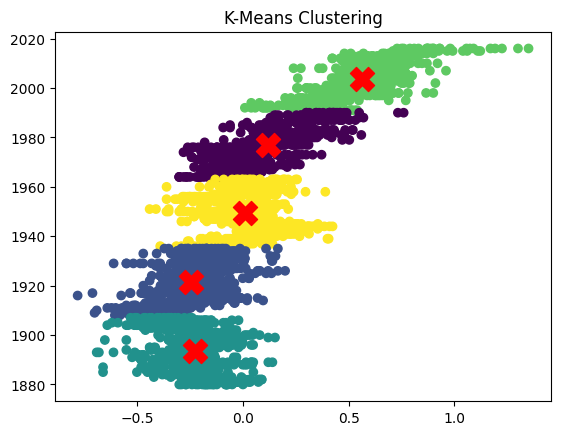

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.title("K-Means")

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='X')

plt.title("K-Means Clustering")
plt.show()

### Evaluation

In [18]:
# printing inertia: Measures how far data points are from their centroids.
kmeans.inertia_

246874.0856942815

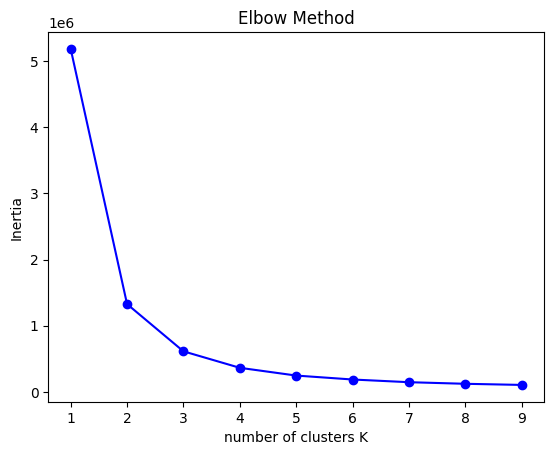

In [19]:
# elbow method, looking for optimal K
K = range(1, 10)
inertias = []
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0)
    kmean.fit(X)
    inertias.append(kmean.inertia_)
    
plt.plot(K, inertias, 'bo-')
plt.xlabel("number of clusters K")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [20]:
X, X.shape

(array([[ 7.895e-01,  2.016e+03,  1.200e+01,  6.000e+00,  1.000e+00,
          0.000e+00],
        [ 8.100e-01,  2.016e+03,  1.200e+01,  6.000e+00,  0.000e+00,
          1.000e+00],
        [ 7.504e-01,  2.016e+03,  1.100e+01,  6.000e+00,  1.000e+00,
          0.000e+00],
        ...,
        [-2.100e-01,  1.880e+03,  2.000e+00,  6.000e+00,  0.000e+00,
          1.000e+00],
        [ 9.000e-04,  1.880e+03,  1.000e+00,  6.000e+00,  1.000e+00,
          0.000e+00],
        [-3.000e-01,  1.880e+03,  1.000e+00,  6.000e+00,  0.000e+00,
          1.000e+00]], shape=(3288, 6)),
 (3288, 6))

Cluster centers: [[ 4.03897870e-01  1.99400000e+03  6.50000000e+00  6.00000000e+00
   5.00000000e-01  5.00000000e-01]
 [-2.48820471e-01  1.90250000e+03  6.50000000e+00  6.00000000e+00
   5.00000000e-01  5.00000000e-01]
 [-3.73269928e-02  1.94850000e+03  6.50000000e+00  6.00000000e+00
   5.00000000e-01  5.00000000e-01]]
Labels: [0 0 0 ... 1 1 1]


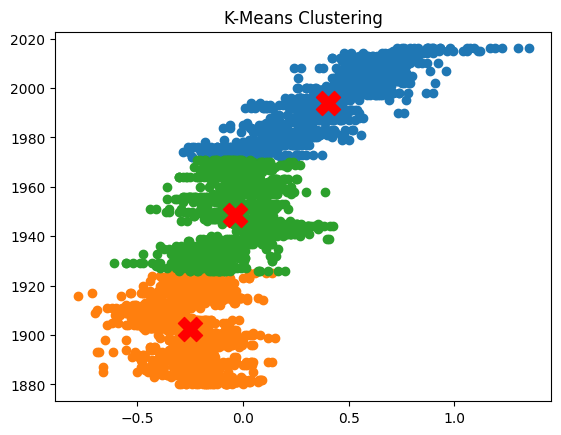

In [21]:
kmeans_2 = KMeans(n_clusters=3, init='k-means++') # applying 3
kmeans_2.fit(X)

# Get the cluster centroids and labels
centroids = kmeans_2.cluster_centers_
labels = kmeans_2.labels_

print("Cluster centers:", centroids)
print("Labels:", labels)

for cluster in range(4):
    cluster_points = X[labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')


plt.title("K-Means Clustering")
plt.show()

In [23]:
df.head()

Mean  Year  Month  Day  Source_GCAG  Source_GISTEMP
0  0.7895  2016     12    6            1               0
1  0.8100  2016     12    6            0               1
2  0.7504  2016     11    6            1               0
3  0.9300  2016     11    6            0               1
4  0.7292  2016     10    6            1               0

### Prediction with Sample Data

In [24]:
new_X = pd.DataFrame({
    "Source": ["GISTEMP"],
    "Mean": [0.7895],
    "Date": ["2016-01-15"],
                      })

In [25]:
new_X.head()

Source    Mean        Date
0  GISTEMP  0.7895  2016-01-15

In [ ]:
def process_data(input_X: pd.DataFrame) -> np.array:
    """ 
    Processes user input data into usable form for the KMeans model to predict.
    
    Args:
        input_X (pd.DataFrame): Input data in dataframe format with one instance.
    
    Returns:
        np.array: An numpy array for the KMeans model to predict
    """
    
    input_X = input_X.copy()
    
    # Split up the dates
    if 'Date' in input_X.columns:
        dates = pd.to_datetime(input_X['Date'])
        input_X['Date'] = dates

        input_X['Year'] = input_X['Date'].dt.year
        input_X['Month'] = input_X['Date'].dt.month
        input_X['Day'] = input_X['Date'].dt.day

        input_X.drop('Date', axis=1, inplace=True)
    
    input_X = pd.get_dummies(input_X, prefix=['Source'], dtype=int)
    
    for col in ['Source_GCAG', 'Source_GISTEMP']:
        if col not in input_X.columns:
            input_X[col] = 0

    # Reorder columns to ensure correct order
    input_X = input_X[['Mean', 'Year', 'Month', 'Day', 'Source_GCAG', 'Source_GISTEMP']]
   
    arr_X = input_X.to_numpy() 
    
    return arr_X

In [27]:
new_X

Source    Mean        Date
0  GISTEMP  0.7895  2016-01-15

In [35]:
arr_X = process_data(new_X)
print(arr_X, arr_X.shape)

[[7.895e-01 2.016e+03 1.000e+00 1.500e+01 0.000e+00 1.000e+00]] (1, 6)


In [29]:
predictions = kmeans_2.predict(arr_X)
print(f"Predicted clusters: {predictions}")

Predicted clusters: [0]


In [30]:
def plot_clusters(model: KMeans, X: np.array, input_X: np.array) -> None:
    """
    Plots the predicted class to the clusters.
    
    Args:
        model (KMeans): A KMeans model trained on X input
        X (np.array): The numpy array version of the dataset
        input_X (np.array): The numpy array of the input 
        
    Returns:
        None
    """
    centroids = model.cluster_centers_
    labels = model.labels_
    
    plt.figure(figsize=(10, 6))

    for cluster in range(3):
        cluster_points = X[labels == cluster]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

    # Highlight the predicted cluster and point
    plt.scatter(input_X[:, 0], input_X[:, 1], s=300, c='red', marker='P', label=f'Predicted Cluster: {predictions[0]}')

    plt.title('K-Means Clustering with Predicted Point')
    plt.legend()
    plt.show()

In [31]:
arr_X.shape

(1, 6)

In [32]:
kmeans_2.predict(arr_X)

array([0], dtype=int32)

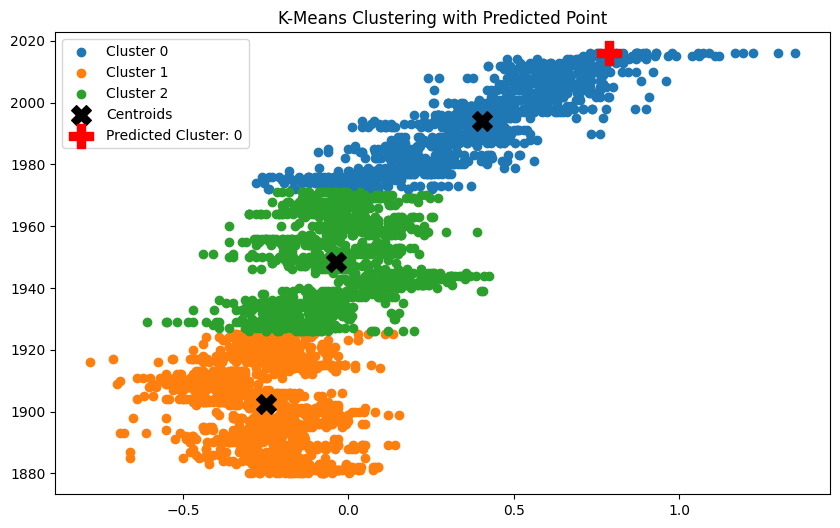

In [33]:
plot_clusters(kmeans_2, X, arr_X)

In [34]:
import joblib
joblib.dump(kmeans_2, './models/kmeans_model.pkl')

['./models/kmeans_model.pkl']